In [16]:
%load_ext autoreload
%autoreload 2
from model_AE import AE
import torch
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
import random
from functions import create_dataloaders, train_epoch, val_epoch, init_model, dataloader_test
import torch.optim as optim
import datetime
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
NUMWORKERS = 4
batch_size = 2
seed = 13

lat_space = 10
num_epochs = 20
learning_rate = 0.0002

In [3]:
model = AE(lat_space=lat_space, device='cuda', variational=True)
summary(model, (1, 56, 56))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]           3,200
       BatchNorm2d-2           [-1, 64, 56, 56]             128
              ReLU-3           [-1, 64, 56, 56]               0
         MaxPool2d-4           [-1, 64, 28, 28]               0
            Conv2d-5           [-1, 64, 28, 28]          36,928
       BatchNorm2d-6           [-1, 64, 28, 28]             128
              ReLU-7           [-1, 64, 28, 28]               0
            Conv2d-8           [-1, 64, 28, 28]          36,928
       BatchNorm2d-9           [-1, 64, 28, 28]             128
          Dropout-10           [-1, 64, 28, 28]               0
             ReLU-11           [-1, 64, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          36,928
      BatchNorm2d-13           [-1, 64, 28, 28]             128
             ReLU-14           [-1, 64,

In [8]:
use_gpu = torch.cuda.is_available()
device = 'cuda' if use_gpu else 'cpu'
if seed is not None:
    seed = int(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

938it [04:13,  3.70it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 1/20 	LOSS for train:1490.480876


938it [04:18,  3.63it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 2/20 	LOSS for train:1042.373274


938it [04:19,  3.61it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 3/20 	LOSS for train:1010.938477


938it [04:19,  3.62it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 4/20 	LOSS for train:993.007352


938it [04:19,  3.62it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 5/20 	LOSS for train:980.857831


938it [04:18,  3.63it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 6/20 	LOSS for train:971.456307


938it [04:20,  3.60it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 7/20 	LOSS for train:964.904598


938it [04:20,  3.59it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 8/20 	LOSS for train:958.477323


938it [04:21,  3.59it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 9/20 	LOSS for train:953.867294


938it [04:21,  3.59it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 10/20 	LOSS for train:950.924363


938it [04:20,  3.60it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 11/20 	LOSS for train:947.509874


938it [04:19,  3.62it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 12/20 	LOSS for train:944.671493


938it [04:17,  3.64it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 13/20 	LOSS for train:942.006513


938it [04:18,  3.63it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 14/20 	LOSS for train:939.680310


938it [04:19,  3.62it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 15/20 	LOSS for train:937.598118


938it [04:18,  3.63it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 16/20 	LOSS for train:936.061222


938it [04:17,  3.64it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 17/20 	LOSS for train:934.850716


938it [04:17,  3.64it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 18/20 	LOSS for train:933.169760


938it [04:21,  3.59it/s]                         
  0%|          | 0/937 [00:00<?, ?it/s]

EPOCH 19/20 	LOSS for train:931.306682


938it [04:21,  3.59it/s]                         


EPOCH 20/20 	LOSS for train:930.734770
Total training time: 1:26:24.050532


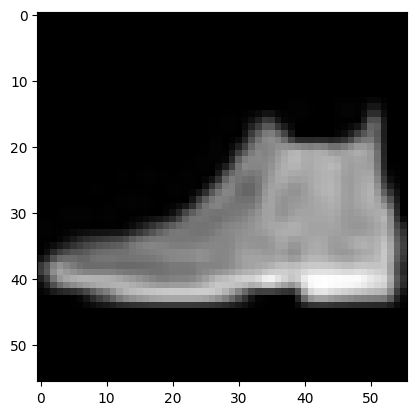

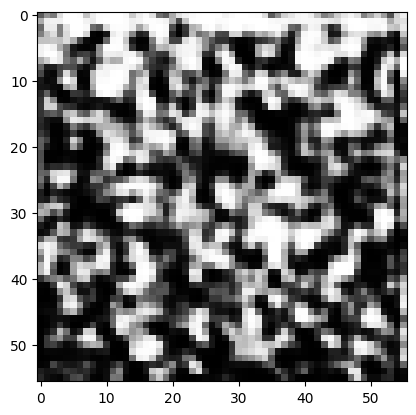

In [17]:

vae, metrics = init_model('vae', Path('C:\\Users\\Robinumut\\Desktop\\archive'), device, lat_space, variational=True)
tr, tst = dataloader_test()

def loss_fn(_h, x, mean, logvar):
    x = (x + 1.0) / 2.0 
    repr_loss = torch.nn.functional.binary_cross_entropy(_h, x, reduction='sum')
    KLD = -0.5 * torch.sum(1+logvar-mean.pow(2)-logvar.exp())

    return repr_loss + KLD

loss_func = loss_fn
optim = optim.Adam(vae.parameters(), lr=learning_rate)

t = datetime.datetime.now()
for epoch in range(1, num_epochs+1):
    train_loss = train_epoch(vae, tr, loss_func, optim, vae=True)
    #val_loss = val_epoch(ae, tst, loss_fn)

    print('EPOCH {}/{} \tLOSS for train:'
            '{:3f}'
            .format(epoch, num_epochs, train_loss))
    #metrics.append(train_loss, val_loss)

#metrics.plot(f'Variational Autoencoder')
#ae.plot_outputs(tst.dataset, 5)
print("Total training time:",datetime.datetime.now() - t)

vae.eval()
with torch.no_grad():
    for data, _ in tst:
        
        x = data.to(device)

        _h, _, _ = model(x)
        break

fig = plt.figure()
plt.imshow(x[0].cpu().squeeze().numpy(), cmap='gist_gray')

fig = plt.figure()
plt.imshow(_h[0].cpu().squeeze().numpy(), cmap='gist_gray')
